In [103]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics

In [104]:
data = pd.read_csv("TBD_Partido.csv")
data = data.dropna()
data = data.rename(columns={'Unnamed: 0': 'Depto'})
data["Vot_Max"] = data["Vot_Max"].astype(int)
data

,Depto,Indice_2018,Indice_2019,Indice_2020,Vot_Max,Prob_Part_Gan,Partido
0,Antioquia,50.8,51.0,49.0,502148,0.739966,Centro_Democrático
1,Atlántico,50.6,50.5,46.6,284220,0.870300,Cambio_Radical
2,Bolívar,46.4,46.3,43.4,69109,0.368607,Partido_Liberal
3,Boyacá,48.6,45.5,40.0,70264,0.558733,Alianza_Verde
4,Caldas,47.0,46.8,46.5,52689,0.574812,Partido_Liberal
5,Caquetá,44.0,43.1,43.1,11530,0.494956,Centro_Democrático
6,Cauca,49.3,47.5,45.3,49164,0.554079,Cambio_Radical
7,Cesar,42.9,43.6,39.0,76450,0.664731,Partido_de_la_U
8,Chocó,36.3,32.6,28.6,14851,0.451481,Partido_Liberal
9,Córdoba,48.2,47.3,43.6,120065,0.482549,Partido_Conservador


In [105]:
new_data = data.iloc[:,:]

le_Depto = preprocessing.LabelEncoder()
new_data["Depto"] = le_Depto.fit_transform(new_data["Depto"])

le_Partido = preprocessing.LabelEncoder()
new_data["Partido"] = le_Partido.fit_transform(new_data["Partido"])

new_data

,Depto,Indice_2018,Indice_2019,Indice_2020,Vot_Max,Prob_Part_Gan,Partido
0,0,50.8,51.0,49.0,502148,0.739966,2
1,1,50.6,50.5,46.6,284220,0.870300,1
2,2,46.4,46.3,43.4,69109,0.368607,4
3,3,48.6,45.5,40.0,70264,0.558733,0
4,4,47.0,46.8,46.5,52689,0.574812,4
5,5,44.0,43.1,43.1,11530,0.494956,2
6,6,49.3,47.5,45.3,49164,0.554079,1
7,7,42.9,43.6,39.0,76450,0.664731,5
8,8,36.3,32.6,28.6,14851,0.451481,4
9,10,48.2,47.3,43.6,120065,0.482549,3


In [106]:
def prom(x_1, x_2, x_3):
    return np.mean(np.array([x_1,x_2,x_3]))

new_data['prom_Indices'] = new_data.apply(lambda x: prom(x.Indice_2018, x.Indice_2019, x.Indice_2020), axis=1)
new_data

,Depto,Indice_2018,Indice_2019,Indice_2020,Vot_Max,Prob_Part_Gan,Partido,prom_Indices
0,0,50.8,51.0,49.0,502148,0.739966,2,50.266667
1,1,50.6,50.5,46.6,284220,0.870300,1,49.233333
2,2,46.4,46.3,43.4,69109,0.368607,4,45.366667
3,3,48.6,45.5,40.0,70264,0.558733,0,44.700000
4,4,47.0,46.8,46.5,52689,0.574812,4,46.766667
5,5,44.0,43.1,43.1,11530,0.494956,2,43.400000
6,6,49.3,47.5,45.3,49164,0.554079,1,47.366667
7,7,42.9,43.6,39.0,76450,0.664731,5,41.833333
8,8,36.3,32.6,28.6,14851,0.451481,4,32.500000
9,10,48.2,47.3,43.6,120065,0.482549,3,46.366667


In [107]:
#new_data[["Indice_2018"]] = new_data["Indice_2018"].apply(lambda x: float(x.replace(',', '.')))
#new_data[["Indice_2019"]] = new_data["Indice_2019"].apply(lambda x: float(x.replace(',', '.')))
#new_data[["Indice_2020"]] = new_data["Indice_2020"].apply(lambda x: float(x.replace(',', '.')))
#new_data

prom_votmax = np.mean(new_data["Vot_Max"])
prom_ind = np.mean(new_data["prom_Indices"])

In [108]:
def f(x_1, x_2):
    if(x_1<=prom_votmax and x_2>=prom_ind):
        return 1
    else:
        return 0

new_data['class'] = new_data.apply(lambda x: f(x.Vot_Max, x.prom_Indices), axis=1)
new_data

,Depto,Indice_2018,Indice_2019,Indice_2020,Vot_Max,Prob_Part_Gan,Partido,prom_Indices,class
0,0,50.8,51.0,49.0,502148,0.739966,2,50.266667,0
1,1,50.6,50.5,46.6,284220,0.870300,1,49.233333,0
2,2,46.4,46.3,43.4,69109,0.368607,4,45.366667,0
3,3,48.6,45.5,40.0,70264,0.558733,0,44.700000,0
4,4,47.0,46.8,46.5,52689,0.574812,4,46.766667,0
5,5,44.0,43.1,43.1,11530,0.494956,2,43.400000,0
6,6,49.3,47.5,45.3,49164,0.554079,1,47.366667,0
7,7,42.9,43.6,39.0,76450,0.664731,5,41.833333,0
8,8,36.3,32.6,28.6,14851,0.451481,4,32.500000,0
9,10,48.2,47.3,43.6,120065,0.482549,3,46.366667,0


In [109]:
logistic1 = LogisticRegression(max_iter=3000)
X = new_data[["Depto"]+["Indice_2018"]+["Indice_2019"]+["Indice_2020"]+["Vot_Max"] + ["Prob_Part_Gan"]+["Partido"] + ["prom_Indices"]]
y = new_data[["class"]]


logistic1.fit(X,y)

C:\Users\nandi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=3000)

In [110]:
predict1 = logistic1.predict(X)
predict1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1], dtype=int64)

In [111]:
sklearn.metrics.precision_score(y, predict1, pos_label=0)

0.9166666666666666

In [112]:
sklearn.metrics.precision_score(y, predict1, pos_label=1)

0.7272727272727273

In [113]:
sklearn.metrics.recall_score(y, predict1, pos_label=0)

0.7857142857142857

In [114]:
sklearn.metrics.recall_score(y, predict1, pos_label=1)

0.8888888888888888

In [115]:
sklearn.metrics.f1_score(y, predict1, pos_label=0)

0.8461538461538461

In [116]:
sklearn.metrics.f1_score(y, predict1, pos_label=1)

0.7999999999999999

In [117]:
proba = logistic1.predict_proba(X)

Text(0.5, 1.0, 'Promedio indices vs probabilidad alta')

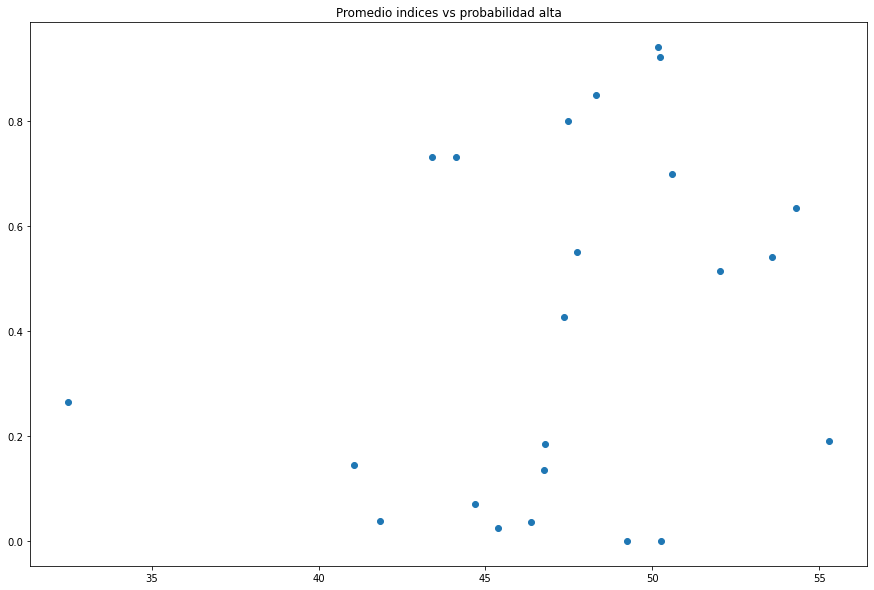

In [129]:
plt.figure(figsize=(15,10))
plt.scatter(X.iloc[:,-1], proba[:,1])
plt.title("Promedio indices vs probabilidad alta")

Text(0.5, 1.0, 'Número votos máximo vs probabilidad alta')

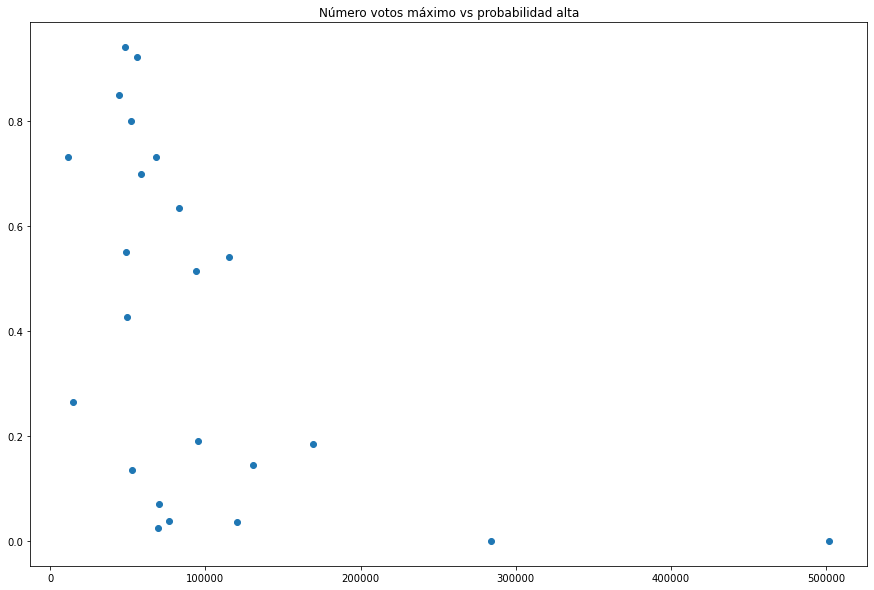

In [130]:
plt.figure(figsize=(15,10))
plt.scatter(X.iloc[:,4], proba[:,1])
plt.title("Número votos máximo vs probabilidad alta")

In [126]:
print(proba)

[[9.99999999e-01 5.46335326e-10]
 [9.99991462e-01 8.53797802e-06]
 [9.75007018e-01 2.49929816e-02]
 [9.29612378e-01 7.03876215e-02]
 [8.65500082e-01 1.34499918e-01]
 [2.68360702e-01 7.31639298e-01]
 [5.73793948e-01 4.26206052e-01]
 [9.62535322e-01 3.74646780e-02]
 [7.35412565e-01 2.64587435e-01]
 [9.63272818e-01 3.67271818e-02]
 [8.09134352e-01 1.90865648e-01]
 [1.49914181e-01 8.50085819e-01]
 [4.50034929e-01 5.49965071e-01]
 [8.55231224e-01 1.44768776e-01]
 [2.00160445e-01 7.99839555e-01]
 [4.84960605e-01 5.15039395e-01]
 [2.69504230e-01 7.30495770e-01]
 [3.00668199e-01 6.99331801e-01]
 [5.93000602e-02 9.40699940e-01]
 [3.66385783e-01 6.33614217e-01]
 [8.14684093e-01 1.85315907e-01]
 [7.83392682e-02 9.21660732e-01]
 [4.59341122e-01 5.40658878e-01]]
